# Drawing the multipanel barplot for wind difference: all AR6 land regions

In [3]:
ensembles = c('CMIP5', 'CMIP6')
GWLs = c('1.5','2','4')
scenarios = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')

data = list()
for (ensemble in ensembles){
    data[[ensemble]] = list()
    for (GWL in GWLs){
        data[[ensemble]][[GWL]] = list()
    }
    for (scenario in scenarios){
        data[[ensemble]][[scenario]] = list()
    }

}

## 1. Get the data from the json files

In [4]:
library(rjson)

In [5]:
# -- CMIP6
ensemble = 'CMIP6'
json_file = paste('/home/jservon/Chapter12_IPCC/data/wind_satellites/',ensemble,'_sfcWind_diff_AR6_regional_averages.json',sep='')

#quantiles_dict[clim_period][region_name] = [q10, q50, q90]
#
json_data <- fromJSON(paste(readLines(json_file), collapse=""))
AR6_regions = names(json_data[['1.5']])

Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/wind_satellites/CMIP6_sfcWind_diff_AR6_regional_averages.json'”


In [6]:
AR6_regions

[1] "ARP"  "CAF"  "CAR"  "CAU"  "CNA"  "EAN"  "EAS"  "EAU"  "ECA"  "EEU" 
[11] "ENA"  "ESAF" "ESB"  "GIC"  "MDG"  "MED"  "NAU"  "NCA"  "NEAF" "NEN" 
[21] "NES"  "NEU"  "NSA"  "NWN"  "NWS"  "NZ"   "RAR"  "RFE"  "SAH"  "SAM" 
[31] "SAS"  "SAU"  "SCA"  "SEA"  "SEAF" "SES"  "SSA"  "SWS"  "TIB"  "WAF" 
[41] "WAN"  "WCA"  "WCE"  "WNA"  "WSAF" "WSB"

### Prepare R list with all the regions => Get the regions list from the CMIP6 json file, for GWL 1.5K

In [35]:
all_regions = list()
GWLs = c('1.5','2','4')
scenarios = c('baseline','2.6_mid', '8.5_mid', '2.6_late', '8.5_late')

for (region_name in AR6_regions){
    all_regions[[region_name]] = list()
    for (ensemble in c('CMIP6','CMIP5')){
        all_regions[[region_name]][[ensemble]] = list()
        for (GWL in GWLs){
            all_regions[[region_name]][[ensemble]][[GWL]] = list()
        }#end for GWL
        for (scenario in scenarios){
            all_regions[[region_name]][[ensemble]][[scenario]] = list()
        }#end for scenario
    }#end for ensemble
}#end for region_name

In [36]:
ensemble = 'CMIP6'
json_file = paste('/home/jservon/Chapter12_IPCC/data/wind_satellites/',ensemble,'_sfcWind_diff_AR6_regional_averages.json',sep='')
json_data <- fromJSON(paste(readLines(json_file), collapse=""))

for (clim_period in names(json_data)){
    if (clim_period=='historical_1995-2014'){ wclim_period='modern' }
    if (clim_period=='ssp585_2041-2060'){ wclim_period='8.5_mid' }
    if (clim_period=='ssp585_2081-2100'){ wclim_period='8.5_late' }
    if (clim_period=='ssp126_2041-2060'){ wclim_period='2.6_mid' }
    if (clim_period=='ssp126_2081-2100'){ wclim_period='2.6_late' }
    if (clim_period=='1.5'){ wclim_period='1.5' }
    if (clim_period=='2'){ wclim_period='2' }
    if (clim_period=='3'){ wclim_period='3' }
    if (clim_period=='4'){ wclim_period='4' }
    print(wclim_period)
    for (region_name in names(json_data[[clim_period]])){
        all_regions[[region_name]][[ensemble]][[wclim_period]][['vals']] = json_data[[clim_period]][[region_name]]
        print(json_data[[clim_period]][[region_name]])
    }
}

Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/wind_satellites/CMIP6_sfcWind_diff_AR6_regional_averages.json'”


[1] "1.5"
[1] -0.03137853  0.00345354  0.05317801
[1] -0.038145835 -0.003659453  0.070494059
[1] -0.07419495 -0.01132018  0.10729589
[1] -0.03575231 -0.01323627  0.02180869
[1] -0.207547453 -0.054182179 -0.002956891
[1] -0.053053656 -0.012631740 -0.002056665
[1] -0.07510288 -0.03887936  0.04050929
[1] -0.09229839 -0.03002632  0.06184995
[1] -0.07052901 -0.00456329  0.04959314
[1] -0.099906739 -0.009193012  0.050452454
[1] -0.133619191 -0.052510887  0.001349796
[1] -0.073698981  0.006453998  0.051464602
[1] -0.134059827 -0.009848225  0.022471928
[1] -0.12989177 -0.07341746  0.01131054
[1] -0.030348574 -0.001829157  0.049086008
[1] -0.090154113 -0.034153466  0.003466102
[1] -0.06485586 -0.03497613  0.05396479
[1] -0.07637628 -0.02719276 -0.00496104
[1] -0.02392106  0.03938097  0.06860209
[1] -0.11475361  0.01604365  0.03491979
[1] -0.02612225  0.01177622  0.08167002
[1] -0.08597285 -0.05999341  0.04370794
[1] -0.0603129117  0.0005244901  0.0463594317
[1] -0.10769837  0.03022451  0.062156

In [37]:
ensemble = 'CMIP6'
json_file = paste('/home/jservon/Chapter12_IPCC/data/wind_satellites/',ensemble,'_sfcWind_AR6_regional_averages.json',sep='')
json_data <- fromJSON(paste(readLines(json_file), collapse=""))

clim_period='historical_1995-2014'
wclim_period='modern_raw'
for (region_name in names(json_data[[clim_period]])){
    all_regions[[region_name]][[ensemble]][[wclim_period]][['vals']] = json_data[[clim_period]][[region_name]]
    print(json_data[[clim_period]][[region_name]])
}

Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/wind_satellites/CMIP6_sfcWind_AR6_regional_averages.json'”


[1] 2.821832 3.654534 4.598963
[1] 1.660382 2.183471 2.652077
[1] 6.267422 6.798422 7.135019
[1] 3.906131 4.633264 5.488127
[1] 3.452944 4.165307 4.791189
[1] 5.262416 6.813728 7.754022
[1] 4.103992 4.428927 4.828456
[1] 3.945818 4.561197 5.024228
[1] 2.427345 3.395354 4.746328
[1] 3.165708 4.048307 4.348963
[1] 4.009569 4.810176 5.075857
[1] 3.152035 3.755316 4.215818
[1] 2.309399 2.997034 3.748990
[1] 4.921475 5.789076 6.352138
[1] 4.874163 5.131385 5.492320
[1] 3.813055 4.377686 5.194331
[1] 4.757693 5.349660 5.605267
[1] 3.171727 3.679741 4.308579
[1] 2.750444 3.658622 4.367524
[1] 4.163829 4.728599 5.387209
[1] 2.864197 3.434029 3.814189
[1] 5.626083 6.135787 6.505886
[1] 1.805375 2.399089 3.112037
[1] 3.503850 4.168264 4.766710
[1] 2.186749 2.846424 3.344391
[1] 7.482877 7.931454 8.435575
[1] 4.120818 4.534985 5.171833
[1] 4.377013 5.077617 5.587052
[1] 3.838679 4.551793 5.534368
[1] 1.286580 1.850522 2.363003
[1] 2.911945 3.444196 3.927603
[1] 6.650487 7.183389 7.703616
[1] 4.04

In [38]:
all_regions[['NWS']]

$CMIP6
$CMIP6$`1.5`
$CMIP6$`1.5`$vals
[1] -0.05421530 -0.01360734  0.01842445


$CMIP6$`2`
$CMIP6$`2`$vals
[1] -0.053590029 -0.015779064  0.007220128


$CMIP6$`4`
$CMIP6$`4`$vals
[1] -0.071974817 -0.015877848 -0.001205121


$CMIP6$baseline
list()

$CMIP6$`2.6_mid`
$CMIP6$`2.6_mid`$vals
[1] -0.06404726 -0.01577906  0.01242186


$CMIP6$`8.5_mid`
$CMIP6$`8.5_mid`$vals
[1] -0.07465311 -0.02206686  0.01022406


$CMIP6$`2.6_late`
$CMIP6$`2.6_late`$vals
[1] -0.05737620 -0.01182919  0.01314377


$CMIP6$`8.5_late`
$CMIP6$`8.5_late`$vals
[1] -0.12460141 -0.05349583  0.05699334


$CMIP6$`3`
$CMIP6$`3`$vals
[1] -0.05938708 -0.01568028  0.01249269


$CMIP6$modern_raw
$CMIP6$modern_raw$vals
[1] 2.186749 2.846424 3.344391



$CMIP5
$CMIP5$`1.5`
list()

$CMIP5$`2`
list()

$CMIP5$`4`
list()

$CMIP5$baseline
list()

$CMIP5$`2.6_mid`
list()

$CMIP5$`8.5_mid`
list()

$CMIP5$`2.6_late`
list()

$CMIP5$`8.5_late`
list()

In [8]:
names(json_data)

[1] "1.5"              "2"                "3"                "4"               
[5] "ssp126_2041-2060" "ssp126_2081-2100" "ssp585_2041-2060" "ssp585_2081-2100"

In [39]:
ensemble = 'CMIP5'
json_file = paste('/home/jservon/Chapter12_IPCC/data/wind_satellites/',ensemble,'_sfcWind_diff_AR6_regional_averages.json',sep='')
json_data <- fromJSON(paste(readLines(json_file), collapse=""))

for (clim_period in names(json_data)){
    if (clim_period=='baseline'){ wclim_period='modern' }
    if (clim_period=='rcp85_mid'){ wclim_period='8.5_mid' }
    if (clim_period=='rcp85_far'){ wclim_period='8.5_late' }
    if (clim_period=='rcp26_mid'){ wclim_period='2.6_mid' }
    if (clim_period=='rcp26_far'){ wclim_period='2.6_late' }
    if (clim_period=='1.5'){ wclim_period='1.5' }
    if (clim_period=='2'){ wclim_period='2' }
    if (clim_period=='3'){ wclim_period='3' }
    if (clim_period=='4'){ wclim_period='4' }
    print(wclim_period)
    for (region_name in names(json_data[[clim_period]])){
        all_regions[[region_name]][[ensemble]][[wclim_period]][['vals']] = json_data[[clim_period]][[region_name]]
        print(json_data[[clim_period]][[region_name]])
    }
}

Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/wind_satellites/CMIP5_sfcWind_diff_AR6_regional_averages.json'”


[1] "1.5"
[1] -0.021084396  0.002560127  0.018771764
[1] -0.011896244  0.003638014  0.043105535
[1] -0.063465105  0.003372976  0.067579550
[1] -0.058877598 -0.009048986  0.073730990
[1] -0.09036881 -0.01715410  0.06500716
[1] -0.034299177 -0.005596442  0.012536312
[1] -0.05201342 -0.01057670  0.01757925
[1] -0.01762082  0.01585456  0.06507415
[1] -0.07020576 -0.02318116  0.01936713
[1] -0.08413266 -0.01711995  0.04300216
[1] -0.06570856 -0.01011889  0.01368499
[1] -0.02292325  0.02041698  0.05801997
[1] -0.08324634 -0.01074544  0.04032394
[1] -0.09844920 -0.04172628  0.01829618
[1] -0.05473878 -0.01542553  0.04154587
[1] -0.07681554 -0.03174569  0.01509977
[1] -0.030582359  0.004438009  0.043405018
[1] -0.066300835 -0.009245895  0.023685547
[1] -0.0339393718  0.0001888318  0.0302854592
[1] -0.053877803 -0.007807004  0.028807679
[1] -0.01642168  0.03886968  0.09829565
[1] -0.064214473 -0.008477652  0.065061650
[1] -0.01375973  0.01450084  0.07804620
[1] -0.045827662  0.003305796  0.0317

In [50]:
ensemble = 'CMIP5'
json_file = paste('/home/jservon/Chapter12_IPCC/data/wind_satellites/',ensemble,'_sfcWind_AR6_regional_averages.json',sep='')
json_data <- fromJSON(paste(readLines(json_file), collapse=""))

clim_period='baseline'
wclim_period='modern_raw'
for (region_name in names(json_data[[clim_period]])){
    all_regions[[region_name]][[ensemble]][[wclim_period]][['vals']] = json_data[[clim_period]][[region_name]]
    print(json_data[[clim_period]][[region_name]])
}


[1] 2.983049 3.529835 4.899094
[1] 1.457335 1.938337 2.097272
[1] 6.113944 6.782763 7.304548
[1] 3.531119 4.508417 5.452306
[1] 3.174486 3.689110 4.404567
[1] 4.638973 6.556409 7.834639
[1] 4.013784 4.534661 5.096276
[1] 3.975925 4.521091 5.305198
[1] 2.471979 2.893908 5.116272
[1] 3.225777 3.581149 4.289455
[1] 4.059988 4.582560 5.443255
[1] 3.249963 3.781737 4.103407
[1] 2.289235 2.759814 3.293059
[1] 4.883253 5.302999 6.463343
[1] 4.600716 5.085194 5.624260
[1] 3.737333 4.086700 5.041099
[1] 4.348108 5.117550 5.690065
[1] 3.033530 3.414185 4.218814
[1] 2.903982 3.551040 4.463467
[1] 3.967878 4.592192 5.216632
[1] 2.941391 3.347665 3.883285
[1] 4.525037 5.580629 6.483466
[1] 1.496685 2.545596 2.797580
[1] 3.452957 3.753582 4.567158
[1] 1.916744 2.342762 2.793135
[1] 7.336808 7.779828 8.682043
[1] 3.606941 4.254978 4.901062
[1] 4.144880 4.864442 5.713015
[1] 3.377247 4.326764 5.779501
[1] 1.074575 1.581782 2.297787
[1] 2.608976 3.338023 3.721176
[1] 6.393225 7.074852 7.898590
[1] 4.05

In [49]:
region_name

NULL

In [48]:
all_regions[[region_name]][[ensemble]][['modern_raw']]

ERROR: Error in all_regions[[region_name]]: attempt to select less than one element in get1index


In [52]:
for (region_name in AR6_regions){
    ensemble = 'CMIP6'
    all_regions[[region_name]][[ensemble]][['modern_raw']][['color']] = 'black'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue4'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'red'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue4'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'red'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'darkorchid4'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'darkorange'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'tan4'

    ensemble = 'CMIP5'
    all_regions[[region_name]][[ensemble]][['modern_raw']][['color']] = 'grey40'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue3'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'lightcoral'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue3'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'lightcoral'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'darkorchid3'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'sandybrown'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'peachpuff4'

    #ensemble = 'CORDEX'
    #all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'grey60'
    #all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue'
    #all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'lightpink'
    #all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue'
    #all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'lightpink'
    #all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'mediumpurple1'
    #all_regions[[region_name]][[ensemble]][['2']][['color']] = 'navajowhite2'
    #all_regions[[region_name]][[ensemble]][['4']][['color']] = 'peachpuff3'
}#end for region_name

In [11]:
# -- Axe horizontal:
# --   - affecter un indice a chaque horizon + un indice CMIP6, CMIP5, et CORDEX
# --   - boucle sur les horizons / ensembles
# --   - tracer une ligne entre q10/q90 + point sur q50

In [12]:
#seq(-0.2,0.2,by=0.1)

In [18]:
ylim_raw = c(0,10)
ylim_diff = c(-0.5,0.5)

vert_scale(-2, ylim_raw)

[1] -0.2

In [15]:
"vert_scale"=function(val, ylim){
    return( (val - ylim[1]) / (ylim[2] - ylim[1]) )
}

In [72]:
all_regions[['NWS']][['CMIP6']][['']]

NULL

In [73]:
?axis

In [80]:

"draw_legend_box_hor"=function(data, mar=c(0,0,3,0)){

    par(mar=mar)
    plot(0:1,0:1,col='white',xaxt='n',yaxt='n', xlab='', ylab='', bty='n')
    text(-0.02,0.85, "Legend", font=2, cex=3, adj=0)
    linewidth = 0.07
    lwd=22
    #xcol1 = 0.25
    #ycol1 = 0.6
    xcol1 = 0.2
    ycol1 = 0.45
    space_between_cols = linewidth*1.4
    space_between_lines = 0.22
    ycol = ycol1
    xensemble = xcol1 - 0.05
    xensemble = xcol1 - 0.05
    cex_text = 2.1
    cex_title = 2.3
    for (ensemble in c('CMIP6','CMIP5')){
        xcol = xcol1
        text(xensemble, ycol, ensemble, font=1, cex=cex_text, adj=1)
        for (GWL in c('1.5','2','4')){
            lines(c(xcol,xcol+linewidth), c(ycol, ycol), type='l', lwd=lwd, col=data[[ensemble]][[GWL]][['color']])
            if (ensemble=='CMIP6'){
                if (GWL=='1.5'){ tmplab = expression('+1.5'*degree*C) }
                if (GWL=='2'){ tmplab = expression('+2'*degree*C) }
                if (GWL=='4'){ tmplab = expression('+4'*degree*C) }
                text(mean(c(xcol,xcol+linewidth)), ycol1+space_between_lines, tmplab, font=2, cex=cex_text)
                if (GWL=='1.5'){
                    #text(mean(c(xcol,xcol+linewidth)), ycol1+0.1, 'GWL', font=2, cex=1.5)
                    text(xcol, ycol1+space_between_lines*2, 'GWL', font=2, cex=cex_title, adj=0)
                }
            }
            xcol = xcol + space_between_cols
        }
        ycol = ycol - space_between_lines
    }

    #xcol1 = 0.45
    xcol1 = 0.55
    #space_between_cols = linewidth*1.6
    ycol = ycol1
    xensemble = xcol1 - 0.05
    xensemble = xcol1 - 0.05
    for (ensemble in c('CMIP6','CMIP5')){
        xcol = xcol1
        #text(xensemble, ycol, ensemble, font=2, cex=cex_text, adj=1)
        for (time_slice in c('modern','2.6_late','8.5_late')){
            if (time_slice=='modern'){ tmplab = 'modern' }
            if (time_slice=='2.6_late'){ tmplab = '2.6' }
            if (time_slice=='8.5_late'){ tmplab = '8.5' }
            lines(c(xcol,xcol+linewidth), c(ycol, ycol), type='l', lwd=lwd, col=data[[ensemble]][[time_slice]][['color']])
            if (ensemble=='CMIP6'){
                text(mean(c(xcol,xcol+linewidth)), ycol1+space_between_lines, tmplab, font=1, cex=cex_text)
            }
            if (time_slice=='modern'){
                #text(mean(c(xcol,xcol+linewidth)), ycol1+0.1, 'GWL', font=2, cex=1.5)
                text(xcol, ycol1+space_between_lines*2, 'RCPs/SSPs', font=2, cex=cex_title, adj=0)
            }
            xcol = xcol + space_between_cols
        }
        ycol = ycol - space_between_lines
    }
        ycol = ycol - space_between_lines
    
    yline = 0.5
    ypos = 0.45
    ylen = 0.3
    #xx = 0.75
    xx = 0.9
    lines(c(xx,xx),c(ypos-ylen,ypos+ylen), type='l', lwd=lwd/3, col='black')
    points(xx,ypos, pch=16, cex=2.6)
    text(xx+0.02,ypos+(ylen*1.1), "P90", font=1, cex=cex_text,adj=0)
    text(xx+0.02,ypos-(ylen*1.1), "P10", font=1, cex=cex_text,adj=0)
    text(xx+0.02,ypos, "median", font=1, cex=cex_text, adj=0)
    
}
#draw_legend_box_vert(data)

[1] "modern_raw CMIP5"
[1] 0.1916744 0.2342762 0.2793135
[1] "modern_raw CMIP6"
[1] 0.2186749 0.2846424 0.3344391
[1] "1.5 CMIP5"
[1] 0.4822869 0.4930163 0.5223841
[1] "1.5 CMIP6"
[1] 0.4457847 0.4863927 0.5184245
[1] "2 CMIP5"
[1] 0.4765135 0.4972533 0.5426557
[1] "2 CMIP6"
[1] 0.4464100 0.4842209 0.5072201
[1] "4 CMIP5"
[1] 0.4511881 0.4827874 0.5478385
[1] "4 CMIP6"
[1] 0.4280252 0.4841222 0.4987949
[1] "2.6_mid CMIP5"
[1] 0.4851920 0.5046716 0.5519646
[1] "2.6_mid CMIP6"
[1] 0.4359527 0.4842209 0.5124219
[1] "8.5_mid CMIP5"
[1] 0.4773901 0.5001659 0.5544955
[1] "8.5_mid CMIP6"
[1] 0.4253469 0.4779331 0.5102241
[1] "2.6_late CMIP5"
[1] 0.4893206 0.5073790 0.5643673
[1] "2.6_late CMIP6"
[1] 0.4426238 0.4881708 0.5131438
[1] "8.5_late CMIP5"
[1] 0.4447172 0.5130380 0.5952461
[1] "8.5_late CMIP6"
[1] 0.3753986 0.4465042 0.5569933


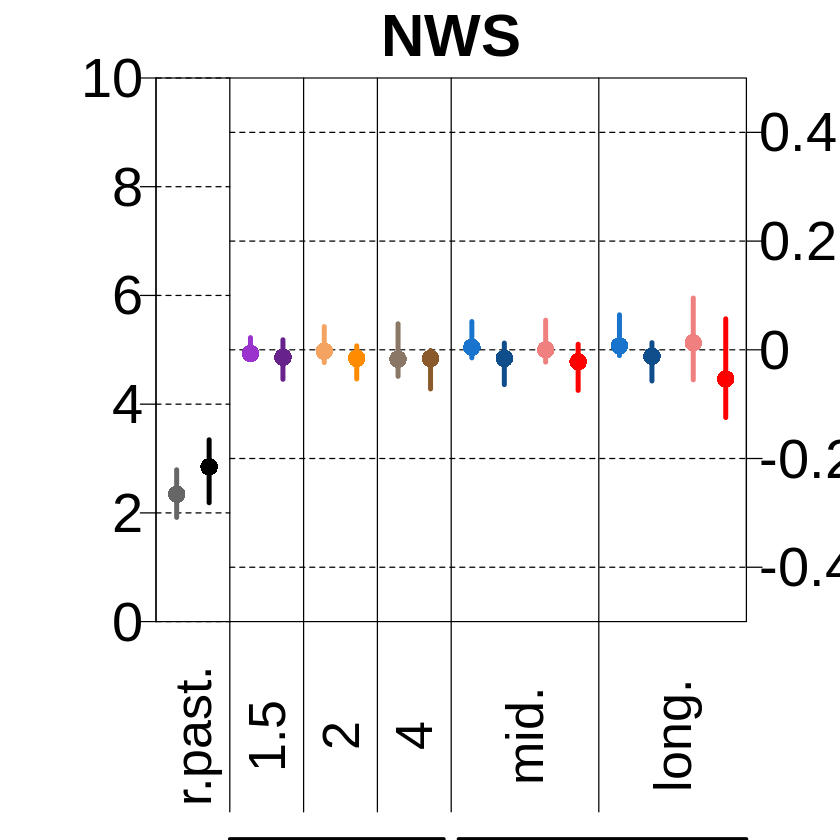

In [103]:
"barplot_satellite_chap12"=function(data, title, ylabel, do_xlab='TRUE',
                                    do_ylab_raw='TRUE', do_ylab_diff='TRUE', mar=c(4,3,2.5,1)){
    #
    # -- Names
    ensembles = c('CMIP5', 'CMIP6')
    GWLs = c('1.5','2','4')
    scenarios = c('2.6_mid', '8.5_mid', '2.6_late', '8.5_late')
    nhorizons = length(GWLs)+length(scenarios)
    
    ylim_base = c(0,1)
    ylim_raw = c(0,10)
    ylim_diff = c(-0.5,0.5)
        
    ylim = ylim_base
    
    # -- position on the x axis of the ensembles
    # RP, GWL 1.5, 2, 4, mid, long
    #xpos = c(1.5,3,4,5, 6, 7, 8, 9)
    #xvert = c(2.5,3.5,4.5,5.5,7.5)
    xpos = c(1, 2,3,4, 5,6, 7,8)
    xvert = c(1.5, 2.5,3.5,4.5, 6.5)
    #xpos = c(1,2,3, 4,5, 6, 7)
    #xvert = c(1.5,2.5,3.5,5.5)
    inner_margin = 0.5
    xlim = c(1-inner_margin, max(xpos)+inner_margin)
    general_cex=1.3
    par(cex=general_cex)
    par(mar=mar)
    plot(1:nhorizons, rep(NA, nhorizons), col='white', ylim=ylim, xlim=xlim,
         xaxt='n', yaxt='n', xlab='', ylab='', xaxs="i", yaxs='i', font=2)
    mtext(ylabel, 2, font=2, line=2.2, cex=general_cex)
    #     cex.axis=1.2, cex.lab=1.5, font=2)
    par(xpd=NA)
    par(font=2)
    
    # -- Add horizontal lines for raw values
    for (yval in vert_scale(seq(0,10,by=2), ylim_raw)){
        lines(c(xlim[1],xvert[1]),rep(yval,2),type='l', lty=2)
    }
    
    # -- Add horizontal lines for diff
    for (yval in vert_scale(seq(-0.4,0.4,by=0.2), ylim_diff)){
        lines(c(xvert[1],xlim[2]),rep(yval,2),type='l', lty=2)
    }
    

    #for (yval in c(0,1,10)^(1/3)){
    #    lines(xlim,rep(yval,2),type='l', lty=2)
    #}
    #abline(h=c(0,1,10,50,100),lty=2)

    delta = 0.22 # - space between CMIP6/CMIP5/CORDEX
    
    # -- Plot data
    # -- Plot baseline
    i = 1
    for (horizon in c('modern_raw',GWLs, scenarios)){
        j = xpos[i] - delta
        for (ensemble in ensembles){
            print(paste(horizon, ensemble))
            if (horizon=='modern_raw'){
                dat = vert_scale(data[[ensemble]][[horizon]][['vals']], ylim_raw)
            }else{
                dat = vert_scale(data[[ensemble]][[horizon]][['vals']], ylim_diff)
            }
            print(dat)
            if (is.null(dat)){dat = c(NA,NA,NA)}
            col = data[[ensemble]][[horizon]][['color']]
            lines(rep(j,2), c(dat[1],dat[3]), type='l', col=col, lwd=4)
            points(j, dat[2], cex=1.5, pch=16, col=col)
            j = j + 2*delta
        }
        i = i + 1
    }

    
    # -- Y axis raw
    yvals = seq(0,10,by=2)
    dumyvals = vert_scale(yvals, ylim_raw)
    ylabels = yvals
    par(cex=2.8)
    axis(2, at=dumyvals, labels=rep('',length(yvals)))
    if (do_ylab_raw=='TRUE'){
        axis(2, pos=0.75, at=dumyvals, tick='FALSE', labels=ylabels, las=1)
    }
    par(cex=general_cex)
    
    # -- Y axis Differences
    yvals = c(-0.4,-0.2,0,0.2,0.4)
    dumyvals = vert_scale(yvals, ylim_diff)
    ylabels = yvals
    par(cex=2.8)
    axis(4, at=dumyvals, labels=rep('',length(yvals)))
    if (do_ylab_diff=='TRUE'){
        axis(4, pos=xlim[2]-0.25, at=dumyvals, labels=ylabels, las=1, tick='FALSE')
    }
    par(cex=general_cex)
    

    # -- X axis
    if (do_xlab=='FALSE'){
        axis(1, at=xvert, labels=rep('',length(xvert)))
    }
    # -- Title
    mtext(title,3, font=2, cex=3, line=0.5)
    #mtext("(a)",3, adj=0, cex=1.8, line=0.5)
    # -- Vertical lines
    #for (v in xvert){lines(c(v,v),ylim,type='l', lty=2)}

    bline = ylim[1] - 0.22*(ylim[2]-ylim[1])
    #btext2 = ylim[1] - 0.33*(ylim[2]-ylim[1])
    #
    # -- X axis
    if (do_xlab=='FALSE'){
        axis(1, at=xvert, labels=rep('',length(xvert)))
    }

    # -- Vertical lines
    vline = ylim
    vline[1] = ylim[1] - (ylim[2]-ylim[1])*0.35
    if (do_xlab=='TRUE'){
        for (v in xvert){lines(c(v,v),vline,type='l', lwd=1)}
    }else{
        for (v in xvert){lines(c(v,v),ylim,type='l')}
    }
    

    if (do_xlab=='TRUE'){
        cex_text = 2
        bline = ylim[1] - 0.4*(ylim[2]-ylim[1])
        #
        # -- Labels GWLs
        GWLs_range = c(1.5,4.4)
        btext = ylim[1] - 0.51*(ylim[2]-ylim[1])
        lines(GWLs_range, c(bline,bline), type='l', lwd=3)
        text(mean(GWLs_range),btext,expression("GWL"), font=1, cex=cex_text*0.9)

        btext2 = ylim[1] - 0.21*(ylim[2]-ylim[1])
        text(1,btext2,"r.past.", cex=cex_text, font=1, srt=90, adj=c(0.5,0.5))
        text(2,btext2,"1.5", cex=cex_text, font=1, srt=90, adj=c(0.5,0.5))
        text(3,btext2,"2", cex=cex_text, font=1, srt=90, adj=c(0.5,0.5))
        text(4,btext2,"4", cex=cex_text, font=1, srt=90, adj=c(0.5,0.5))

        # -- Labels time slices = modern, mid-term, long-term
        xmodern = 4.5
        xmid = 5.5
        xlate = 7.5
        text(xmid,btext2, "mid.", font=1, cex=cex_text, srt=90, adj=c(0.5,0.5))
        text(xlate,btext2, "long.", font=1, cex=cex_text, srt=90, adj=c(0.5,0.5))

        time_slices = c(4.6,8.5)
        lines(time_slices, c(bline,bline), type='l', lwd=3)
        text(mean(time_slices),btext,"Time slices", font=1, cex=cex_text*0.9)
    }#end if do_ylab
    
    
}

#barplot_satellite_chap12(data,"(a) IPCC Region of interest",'Whatever variable (unit)')
barplot_satellite_chap12(all_regions[['NWS']],'NWS', '', mar=c(7,5,2.5,3))

[1] "modern_raw CMIP5"
[1] 0.3452957 0.3753582 0.4567158
[1] "modern_raw CMIP6"
[1] 0.3503850 0.4168264 0.4766710
[1] "1.5 CMIP5"
[1] 0.4541723 0.5033058 0.5317679
[1] "1.5 CMIP6"
[1] 0.3923016 0.5302245 0.5621564
[1] "2 CMIP5"
[1] 0.4460926 0.4865570 0.5433310
[1] "2 CMIP6"
[1] 0.4372881 0.5161303 0.5571960
[1] "4 CMIP5"
[1] 0.3784349 0.4985761 0.5669711
[1] "4 CMIP6"
[1] 0.4379415 0.5067823 0.5555425
[1] "2.6_mid CMIP5"
[1] 0.4421429 0.4775722 0.5105008
[1] "2.6_mid CMIP6"
[1] 0.4229853 0.5164829 0.5446422
[1] "8.5_mid CMIP5"
[1] 0.4119128 0.4785904 0.5405909
[1] "8.5_mid CMIP6"
[1] 0.3884201 0.5018640 0.5523956
[1] "2.6_late CMIP5"
[1] 0.4013088 0.4861251 0.5293596
[1] "2.6_late CMIP6"
[1] 0.4105416 0.5124828 0.5605955
[1] "8.5_late CMIP5"
[1] 0.3606138 0.5061321 0.5699180
[1] "8.5_late CMIP6"
[1] 0.2903350 0.4848171 0.5847883
[1] "modern_raw CMIP5"
[1] 0.3967878 0.4592192 0.5216632
[1] "modern_raw CMIP6"
[1] 0.4163829 0.4728599 0.5387209
[1] "1.5 CMIP5"
[1] 0.4461222 0.4921930 0.52

[1] "modern_raw CMIP5"
[1] 0.2289235 0.2759814 0.3293059
[1] "modern_raw CMIP6"
[1] 0.2309399 0.2997034 0.3748990
[1] "1.5 CMIP5"
[1] 0.4167537 0.4892546 0.5403239
[1] "1.5 CMIP6"
[1] 0.3659402 0.4901518 0.5224719
[1] "2 CMIP5"
[1] 0.3107046 0.4982434 0.5251521
[1] "2 CMIP6"
[1] 0.3672628 0.4727489 0.5218466
[1] "4 CMIP5"
[1] 0.2315833 0.4758364 0.5290961
[1] "4 CMIP6"
[1] 0.3665971 0.4712347 0.5182826
[1] "2.6_mid CMIP5"
[1] 0.3865220 0.4796054 0.5361621
[1] "2.6_mid CMIP6"
[1] 0.3657557 0.4727489 0.5231589
[1] "8.5_mid CMIP5"
[1] 0.3851932 0.5043463 0.5339532
[1] "8.5_mid CMIP6"
[1] 0.3247901 0.4423097 0.5225109
[1] "2.6_late CMIP5"
[1] 0.3518019 0.4922267 0.5392845
[1] "2.6_late CMIP6"
[1] 0.2953198 0.4401718 0.5252622
[1] "8.5_late CMIP5"
[1] 0.3072194 0.4879031 0.5784718
[1] "8.5_late CMIP6"
[1] 0.1636285 0.4284551 0.4854466
[1] "modern_raw CMIP5"
[1] 0.4144880 0.4864442 0.5713015
[1] "modern_raw CMIP6"
[1] 0.4377013 0.5077617 0.5587052
[1] "1.5 CMIP5"
[1] 0.3997243 0.4843017 0.55

[1] "modern_raw CMIP5"
[1] 0.1916744 0.2342762 0.2793135
[1] "modern_raw CMIP6"
[1] 0.2186749 0.2846424 0.3344391
[1] "1.5 CMIP5"
[1] 0.4822869 0.4930163 0.5223841
[1] "1.5 CMIP6"
[1] 0.4457847 0.4863927 0.5184245
[1] "2 CMIP5"
[1] 0.4765135 0.4972533 0.5426557
[1] "2 CMIP6"
[1] 0.4464100 0.4842209 0.5072201
[1] "4 CMIP5"
[1] 0.4511881 0.4827874 0.5478385
[1] "4 CMIP6"
[1] 0.4280252 0.4841222 0.4987949
[1] "2.6_mid CMIP5"
[1] 0.4851920 0.5046716 0.5519646
[1] "2.6_mid CMIP6"
[1] 0.4359527 0.4842209 0.5124219
[1] "8.5_mid CMIP5"
[1] 0.4773901 0.5001659 0.5544955
[1] "8.5_mid CMIP6"
[1] 0.4253469 0.4779331 0.5102241
[1] "2.6_late CMIP5"
[1] 0.4893206 0.5073790 0.5643673
[1] "2.6_late CMIP6"
[1] 0.4426238 0.4881708 0.5131438
[1] "8.5_late CMIP5"
[1] 0.4447172 0.5130380 0.5952461
[1] "8.5_late CMIP6"
[1] 0.3753986 0.4465042 0.5569933
[1] "modern_raw CMIP5"
[1] 0.1496685 0.2545596 0.2797580
[1] "modern_raw CMIP6"
[1] 0.1805375 0.2399089 0.3112037
[1] "1.5 CMIP5"
[1] 0.4862403 0.5145008 0.57

[1] "modern_raw CMIP5"
[1] 0.3916453 0.4435408 0.5029272
[1] "modern_raw CMIP6"
[1] 0.4535626 0.4779546 0.5477131
[1] "1.5 CMIP5"
[1] 0.4703162 0.5013185 0.5341519
[1] "1.5 CMIP6"
[1] 0.4553883 0.4845399 0.5281327
[1] "2 CMIP5"
[1] 0.4856843 0.5168941 0.5641371
[1] "2 CMIP6"
[1] 0.4547422 0.4849843 0.5226104
[1] "4 CMIP5"
[1] 0.4712410 0.5414130 0.6377676
[1] "4 CMIP6"
[1] 0.4484369 0.5055172 0.5306024
[1] "2.6_mid CMIP5"
[1] 0.4710077 0.5130654 0.5483653
[1] "2.6_mid CMIP6"
[1] 0.4396591 0.4843724 0.5231626
[1] "8.5_mid CMIP5"
[1] 0.4810188 0.5412631 0.5937091
[1] "8.5_mid CMIP6"
[1] 0.4633409 0.5137508 0.5520591
[1] "2.6_late CMIP5"
[1] 0.4673600 0.4999763 0.5339897
[1] "2.6_late CMIP6"
[1] 0.4400020 0.4846608 0.5234630
[1] "8.5_late CMIP5"
[1] 0.4633049 0.5530426 0.6586961
[1] "8.5_late CMIP6"
[1] 0.4368281 0.5029389 0.5519752
[1] "modern_raw CMIP5"
[1] 0.3249963 0.3781737 0.4103407
[1] "modern_raw CMIP6"
[1] 0.3152035 0.3755316 0.4215818
[1] "1.5 CMIP5"
[1] 0.4770767 0.5204170 0.55

[1] "modern_raw CMIP5"
[1] 0.3975925 0.4521091 0.5305198
[1] "modern_raw CMIP6"
[1] 0.3945818 0.4561197 0.5024228
[1] "1.5 CMIP5"
[1] 0.4823792 0.5158546 0.5650742
[1] "1.5 CMIP6"
[1] 0.4077016 0.4699737 0.5618499
[1] "2 CMIP5"
[1] 0.4795412 0.5309036 0.6365797
[1] "2 CMIP6"
[1] 0.3956672 0.4600339 0.5440080
[1] "4 CMIP5"
[1] 0.4883089 0.5252066 0.8171223
[1] "4 CMIP6"
[1] 0.4073979 0.4703271 0.5661468
[1] "2.6_mid CMIP5"
[1] 0.4639496 0.5193334 0.6188233
[1] "2.6_mid CMIP6"
[1] 0.3968939 0.4701504 0.5114390
[1] "8.5_mid CMIP5"
[1] 0.4874680 0.5463897 0.7880356
[1] "8.5_mid CMIP6"
[1] 0.3628716 0.4416421 0.5381663
[1] "2.6_late CMIP5"
[1] 0.4646098 0.5352292 0.6868514
[1] "2.6_late CMIP6"
[1] 0.3266236 0.4725724 0.5304748
[1] "8.5_late CMIP5"
[1] 0.4378091 0.5254400 0.8167082
[1] "8.5_late CMIP6"
[1] 0.2434695 0.4537713 0.6147166
[1] "modern_raw CMIP5"
[1] 0.6393225 0.7074852 0.7898590
[1] "modern_raw CMIP6"
[1] 0.6650487 0.7183389 0.7703616
[1] "1.5 CMIP5"
[1] 0.4365367 0.4969107 0.57

png 
  2

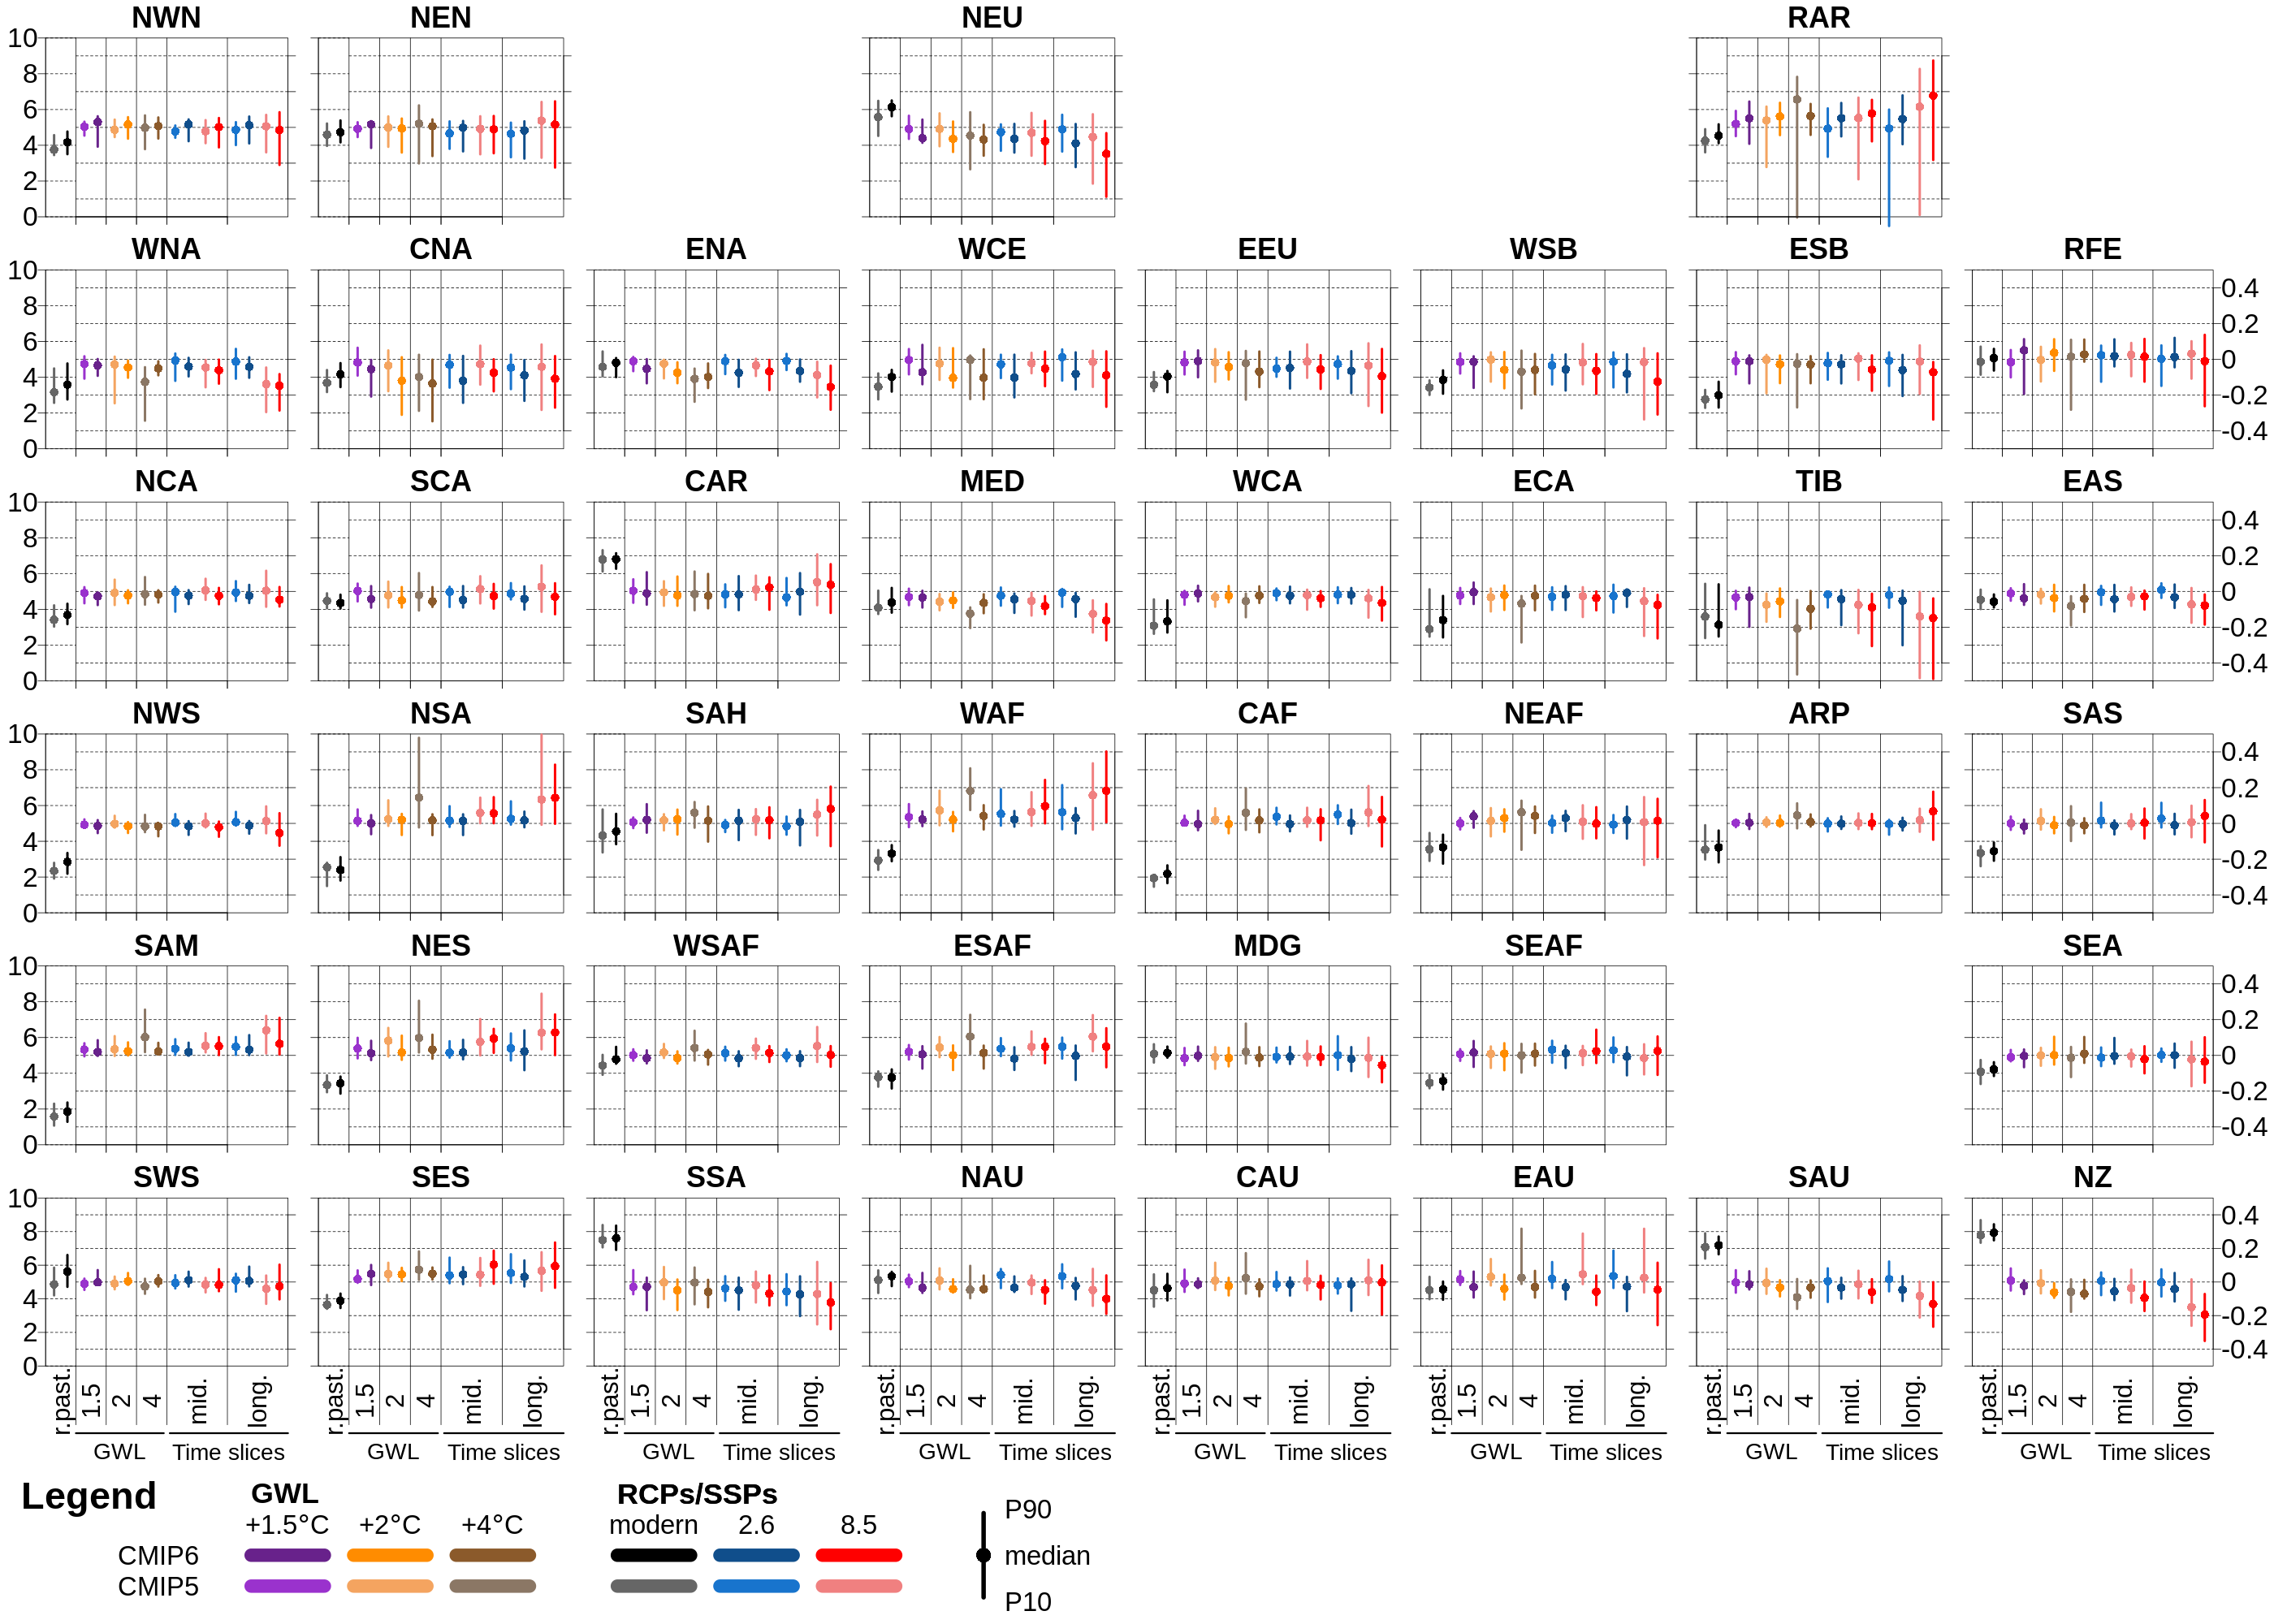

In [108]:
#3 lines
#4 columns
#legend is the last
fsize = 2000
outfilename = paste('~/Chapter12_IPCC/figs/Satellite_barplots/wind_satellite_diff.png',sep='')
png(outfilename, width=fsize*1.4,height=fsize)

#NWN, NEN  NA  # NEU,  NA   NA,  RAR, NA  #
#WNA, CNA, ENA  # WCE, EEU, WSB, ESB, RFE  #
#NCA, SCA, CAR  # MED, WCA, ECA, TIB, EAS  #
#NWS, NSA # SAH,  WAF, CAF, NEAF, ARP, SAS  #
#SAM, NES # WSAF, ESAF, MDG, SEAF, NA, SEA 
#SWS, SES, SSA  # NAU, CAU, EAU, SAU, NZ  #
# Colorbar
mat = rbind(
    c(1, 2, 0, 3, 0, 0, 4, 0),
    c(5, 6, 7, 8, 9, 10,11,12),
    c(13,14,15,16,17,18,19,20),
    c(21,22,23,24,25,26,27,28),
    c(29,30,31,32,33,34,0, 35),
    c(36,37,38,39,40,41,42,43),
    c(44, 44,44,44, 0, 0, 0, 0)
)

AR6_regions = c('NWN', 'NEN', 'NEU', 'RAR',
'WNA', 'CNA', 'ENA', 'WCE', 'EEU', 'WSB', 'ESB', 'RFE',
'NCA', 'SCA', 'CAR', 'MED', 'WCA', 'ECA', 'TIB', 'EAS',
'NWS', 'NSA', 'SAH', 'WAF', 'CAF', 'NEAF', 'ARP', 'SAS',
'SAM', 'NES', 'WSAF', 'ESAF', 'MDG', 'SEAF', 'SEA', 
'SWS', 'SES', 'SSA', 'NAU', 'CAU', 'EAU', 'SAU', 'NZ')

layout(mat,height=c(2,2,2,2,2,2.3,1.7),widths=c(1.1,1,1,1,1,1,1,1.15))


ylab = 'Whatever variable (unit)'
ylab = ''
for (i in 1:length(AR6_regions)){
    region_name = AR6_regions[i]
    plot_title = region_name
    #print(region_name)
    do_ylab_raw = 'FALSE'
    do_ylab_diff = 'FALSE'
    mar=c(1,1,2.5,1)
    if (region_name %in% c('SWS', 'SES', 'SSA', 'NAU', 'CAU', 'EAU', 'SAU', 'NZ')){
        do_xlab='TRUE'
        mar[1]=4
    }else{
        do_xlab='FALSE'
    }
    if (region_name %in% c('NWN','WNA','NCA','NWS','SAM','SWS')){
        do_ylab_raw = 'TRUE'
        mar[2]=3
    }
    if (region_name %in% c('RFE','EAS','SAS','SEA','NZ')){
        do_ylab_diff = 'TRUE'
        mar[2]=1
        mar[4]=4
    }
    
    barplot_satellite_chap12(all_regions[[region_name]],plot_title, ylab,
                             do_xlab=do_xlab, do_ylab_raw=do_ylab_raw, do_ylab_diff=do_ylab_diff, mar=mar)
}
draw_legend_box_hor(all_regions[[region_name]])
dev.off()

library("IRdisplay")
display_png(file=outfilename)  

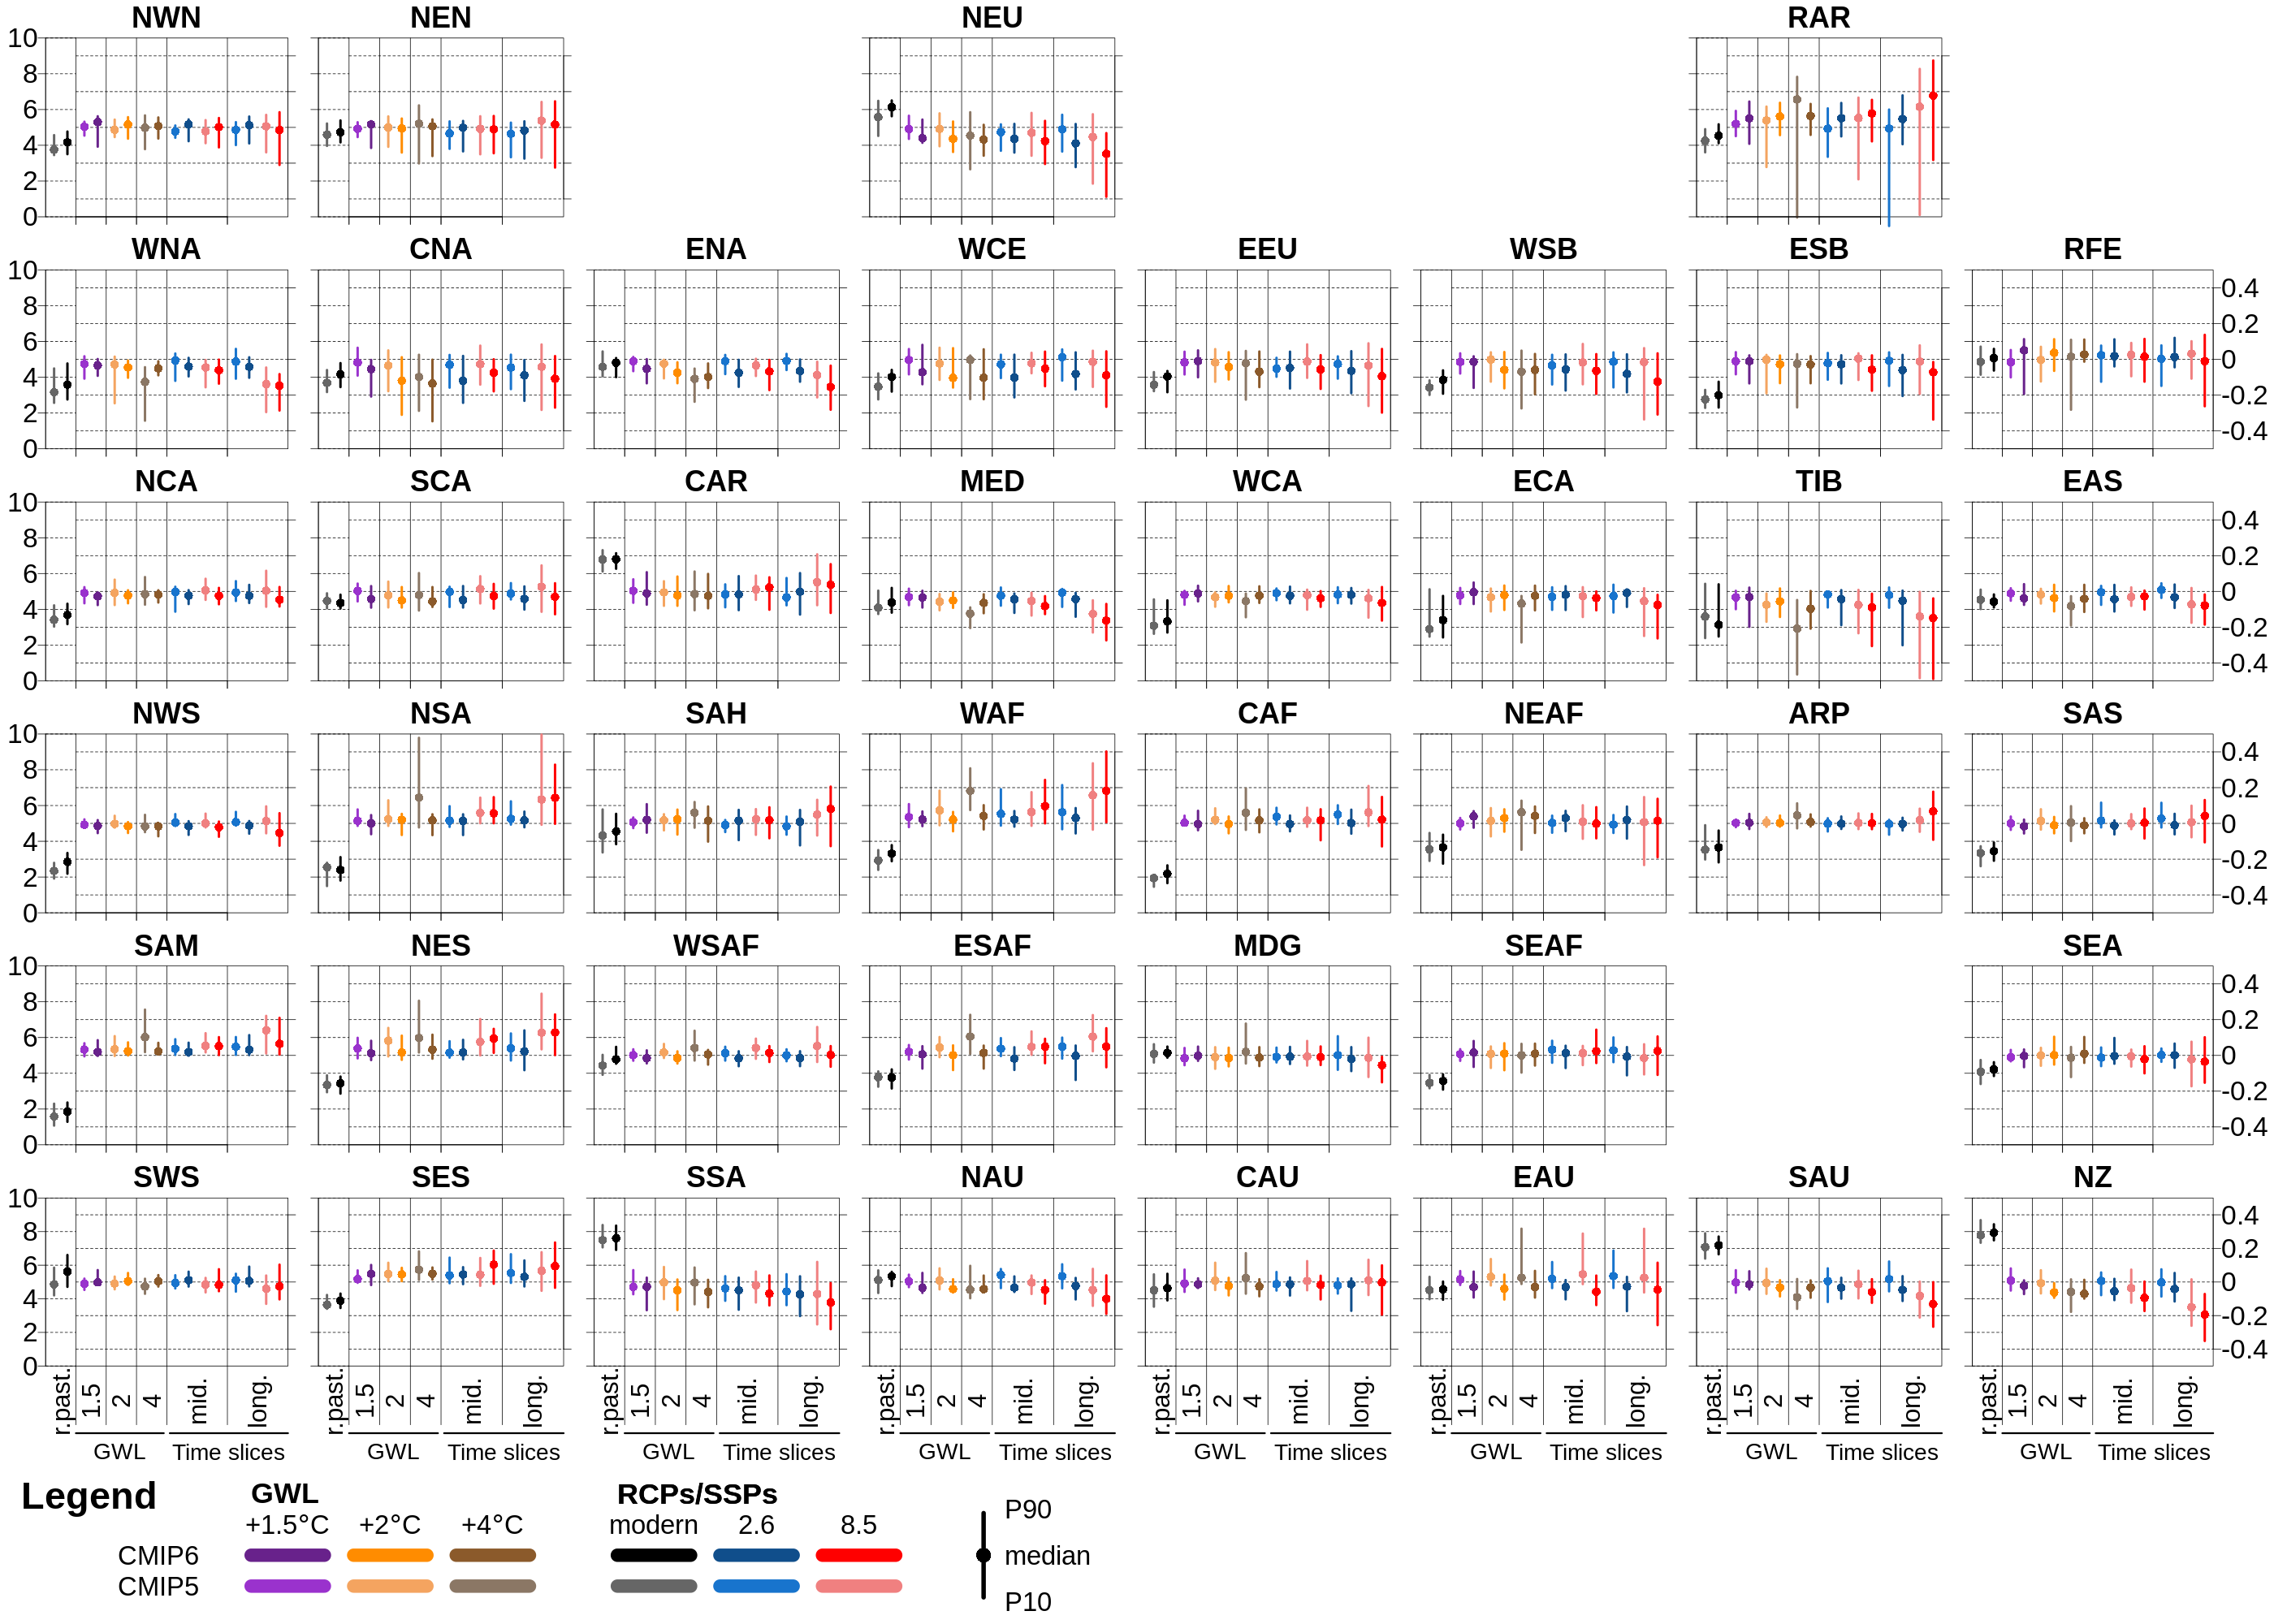

In [109]:
library("IRdisplay")
display_png(file=outfilename)  